In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
A = pd.read_csv('C://Users//user//Desktop//Bank-full.csv')
A.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
from sklearn.preprocessing  import LabelEncoder

le=LabelEncoder()

A['job']=le.fit_transform(A['job'])
A['marital']=le.fit_transform(A['marital'])
A['education']=le.fit_transform(A['education'])
A['default']=le.fit_transform(A['default'])
A['housing']=le.fit_transform(A['housing'])
A['loan']=le.fit_transform(A['loan'])
A['contact']=le.fit_transform(A['contact'])
A['month']=le.fit_transform(A['month'])
A['poutcome'] = le.fit_transform(A['poutcome'])
A

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,yes
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,yes
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,yes
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,no


In [5]:
X = A.drop(labels=['y'],axis=1).values 


In [6]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3)
KM.fit(X)
B=KM.predict(X)


In [13]:
KM.cluster_centers_

array([[4.34494096e+01, 4.50937717e+00, 1.16948368e+00, 1.32414911e+00,
        4.63070155e-04, 6.37554990e+03, 4.85992128e-01, 8.24264876e-02,
        5.87172957e-01, 1.61430887e+01, 5.79393378e+00, 2.76488771e+02,
        2.66543181e+00, 3.98106043e+01, 7.01319750e-01, 2.50127344e+00],
       [4.06329498e+01, 4.32079935e+00, 1.16775497e+00, 1.21181283e+00,
        2.00083779e-02, 6.44943794e+02, 5.64448168e-01, 1.69307345e-01,
        6.46477589e-01, 1.57680556e+01, 5.49084592e+00, 2.56229480e+02,
        2.77446221e+00, 4.02965527e+01, 5.67725402e-01, 2.56602518e+00],
       [4.56375405e+01, 4.45954693e+00, 1.13915858e+00, 1.54368932e+00,
        3.23624595e-03, 2.55013851e+04, 4.01294498e-01, 5.50161812e-02,
        5.63106796e-01, 1.61391586e+01, 5.96116505e+00, 2.55970874e+02,
        2.74433657e+00, 3.26440129e+01, 5.43689320e-01, 2.58576052e+00]])

In [14]:
KM.inertia_

113098644453.27579

In [24]:
from sklearn.metrics import calinski_harabasz_score
score=calinski_harabasz_score(X,KM.labels_)
print(score)

61854.373597060236


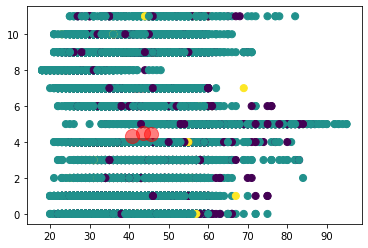

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=B, s=50, cmap='viridis')

centers = KM.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


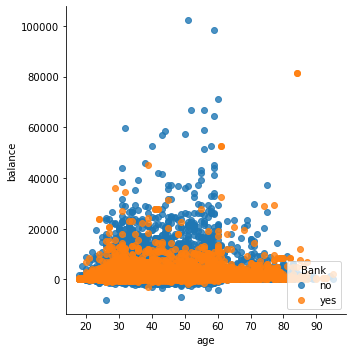

In [11]:
sns.lmplot("age", "balance", hue='y', data=A,fit_reg=False, legend=False)
plt.legend(title='Bank', loc='lower right')
plt.show()


In [8]:
import numpy as np
from sklearn import metrics
def purity_score(C, B):
    contingency_matrix = metrics.cluster.contingency_matrix(C, B)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
purity_score(C,B)

0.8830151954170445